In [1]:
%matplotlib inline
import nivapy3 as nivapy
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import critical_loads as cl
import warnings

warnings.simplefilter('ignore')
plt.style.use('ggplot')

In [2]:
# Connect to PostGIS
eng = nivapy.da.connect_postgis(database='critical_loads')

Connection successful.


# Critical loads: Deposition workflow (high-resolution method; 2018 onwards)

In Spring 2018, the worflow for calculating critical loads was refined to make use of new, higher-resolution input datasets. During November 2018, data handling for the Critical Loads project was also redesigned, with the ultimate aim of centralising all key datasets on NIVA's new cloud platform. 

This notebook deals with data processing and uploading of new deposition data using the higher resolution grid. A brief description of the old deposition datasets is also provided.

**Note:** Data supplied prior to 2017-18 use a different deposition grid (the "BLR" grid). **The workflow here only applies to data supplied from 2017-18 onwards**; earlier data is *not* compatible with the calculations in this notebook. 

## 1. Organising deposition data on the DSToolkit

NIVA's JupyterHub includes a PostGIS database server capable of storing relational and vector geospatial datasets. I have created a database named `critical_loads` and, within this, a schema named `deposition`. This schema contains the following tables:

 * **dep_grid_0_1deg:** Vector geospatial data representing the new 0.1 degree deposition grid
 
 * **dep_grid_blr:** Vector geospatial data representing the old (pre-2018) "BLR" deposition grid
 
 * **dep_param_defs:** Non-spatial table defining parameters and units for the deposition datasets
 
 * **dep_series_defs:** Non-spatial table defining different data processing "series" (time periods, grid resolutions etc.)
 
 * **dep_values_0_1deg_grid:** Non-spatial table containing deposition values for the 0.1 degree grid (indexed by `series_id`, `cell_id` and `parameter_id`)
 
 * **dep_values_blr_grid:** Non-spatial table containing deposition values for the BLR grid (indexed by `series_id`, `cell_id` and `parameter_id`)

## 2. Add deposition data (optional)

The first step, if desired, is to upload new deposition data from NILU for the time period of interest. **You need to connect to the database with admin privileges in order to add/edit data in the database** (use `admin=True` in the `connect_postgis` function above, and then supply a valid username and password).

### 2.1. Define a new deposition series (optional)

The code below extracts the existing deposition series already defined in the database. Click `'Add row'` to create a new row at the bottom of the table (initially a duplicate of the last row), then double-click to edit values and define the new data series, which you can then save back to the database. Note that all columns are mandatory.

In [ ]:
## Define a new deposition series
#ser_grid = cl.view_dep_series(eng)
#ser_grid

In [ ]:
## Add new series to database
#add_df = cl.add_dep_series(ser_grid, eng)
#add_df

### 2.2. Upload deposition data (optional)

In 2017, NILU supplied raw data for the 0.1 degree grid in `.dat` format. The code here assumes new data are supplied in the same way.

Modify the user options in the cell below to match your new data:

 * `ser_id` is the ID of the new row that was added to the table above
 
 * `dat_fold` is the *relative* path to a folder containing **only** the `.dat` files you wish to upload

In [ ]:
## series_id to upload
#ser_id = 28
#
## Folder containing .dat files
#dat_fold = r'../../../data/raw/nilu_dep/2012-2016'

In [ ]:
## Process NILU data and add to db
#df = cl.upload_nilu_0_1deg_dep_data(dat_fold, eng, ser_id)
#df.head()

## 3. Map deposition data

The code below generates choropleth maps of total N and S deposition for the specified data series.

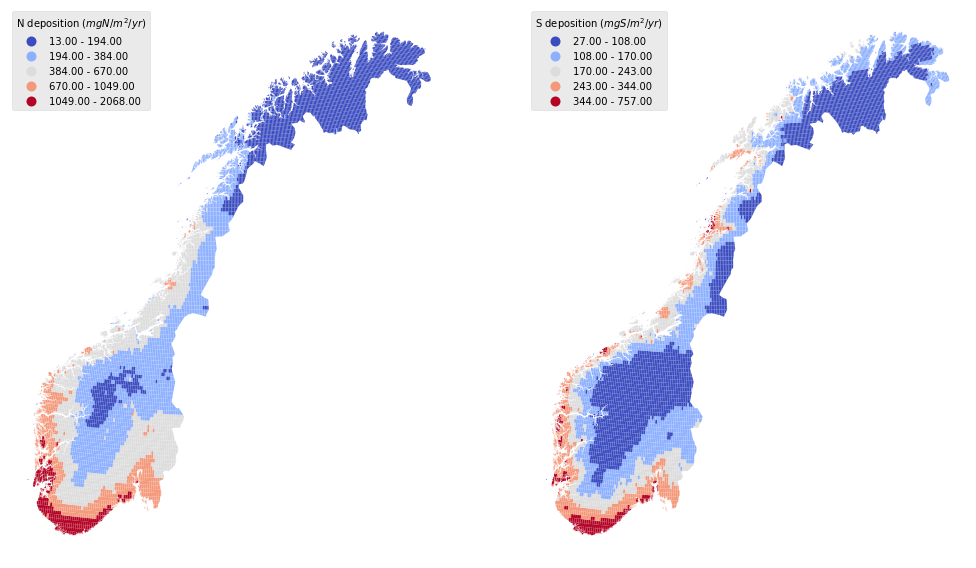

In [3]:
# series_id of interest
ser_id = 28

# Get dep data from database
n_gdf = cl.n_deposition_as_gdf_0_1deg(ser_id, eng)
s_gdf = cl.s_deposition_as_gdf_0_1deg(ser_id, eng)

# Choropleth maps
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

n_gdf.plot(column='n_dep', 
           cmap='coolwarm',
           scheme='fisher_jenks',
           edgecolor=None,
           legend=True,
           legend_kwds={'loc':   'upper left',
                        'title': 'N deposition ($mgN/m^2/yr$)'},
           ax=axes[0],
          )

s_gdf.plot(column='s_dep', 
           cmap='coolwarm',
           scheme='fisher_jenks',
           edgecolor=None,
           legend=True,
           legend_kwds={'loc':   'upper left',
                        'title': 'S deposition ($mgS/m^2/yr$)'},
           ax=axes[1],
          )

axes[0].set_axis_off()
axes[1].set_axis_off()
plt.tight_layout()

## 4. Create deposition rasters

The exceedance calculations now use a raster-based workflow. The code below creates rasters of N and S deposition at the specified resolution for use later. 60 m or 120 m resolution will be sufficient for most purposes and these options are less computationally intensive. If you wish to use 30 m, **you should log out and sign in again on a "high memory" machine**, as the grids involved are large.

In [4]:
# series_id to work with
ser_id = 28

# Choose cell size (30m, 60m or 120m)
cell_size = 120

# Snap tiff
snap_tif = f'/home/jovyan/shared/critical_loads/raster/blr_land_mask_{cell_size}m.tif'

# Output .tifs to create
ndep_tif = f'/home/jovyan/shared/critical_loads/raster/deposition/ndep_12-16_{cell_size}m.tif'
sdep_tif = f'/home/jovyan/shared/critical_loads/raster/deposition/sdep_12-16_{cell_size}m.tif'

In [5]:
#%%time
#
## Create deposition rasters
#cl.create_n_deposition_raster_0_1deg(ser_id, ndep_tif, snap_tif, eng, ndv=-1)
#cl.create_s_deposition_raster_0_1deg(ser_id, sdep_tif, snap_tif, eng, ndv=-1)

CPU times: user 11.8 s, sys: 1.25 s, total: 13 s
Wall time: 13.7 s
